In [122]:
import numpy  as np
import numpy.matlib as mat
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
PATH = os.path.abspath("C:/Users/Owner/Desktop/Cortical_layers_fMRI")
path = r"{0}/derivatives/tsplots/mean_ts".format(PATH)

In [21]:
class ModelResults:
    def __init__(self, subj, path: str = PATH):
        """
        :param subj: Integer or string - number of subject or 'Mean'
        :param path: Mother directory of analysis
        """
        self.path = r"{0}/derivatives/tsplots/mean_ts".format(path)
        self.subj = subj

In [77]:
def get_mean_data(action: str,path: str):
    FieldNames = [
        "SE-EPI",
        "IREPITI630",
        "IREPITI650",
        "IREPITI670",
        "IREPITI690",
        "IREPITI710",
        "IREPITI730",
        "IREPITI750",
    ]
    all_data = pd.DataFrame()
    for field in FieldNames:
        file_name = r"task-{0}_acq-{1}_bold".format(action, field)
        prot_file = pd.read_csv(
            r"{0}/{1}/{1}_subjects_norm_BOLD_response.txt".format(
                path, file_name
            )
        )
        if "IR" in field:
            mean_prot = prot_file.mean(axis=1).rename(int(field[-3:]))
        else:
            mean_prot = prot_file.mean(axis=1).rename(field[-3:])
        print(mean_prot)
        all_data = all_data.append(mean_prot)
    BOLD = all_data.iloc[0:1, :].mean()
    data = all_data.iloc[1:]
    print(data)
    TIlist = []
    for TI in data.index:
        print(TI)
        TIlist.append(TI)
    return BOLD, data, TIlist

In [255]:
BOLD,data,TIlist = get_mean_data(action = 'Sensory',path=path)
BOLD = mat.repmat(BOLD,7,1)
BOLD = BOLD.transpose()

0    0.399509
1    0.384410
2    0.468683
3    0.527318
4    0.495293
5    0.539228
6    0.553021
7    0.452144
8    0.401427
9    0.411429
Name: EPI, dtype: float64
0    0.415680
1    0.432039
2    0.457867
3    0.478362
4    0.548845
5    0.567898
6    0.561869
7    0.584294
8    0.483841
9    0.454639
Name: 630, dtype: float64
0    0.366863
1    0.419126
2    0.427329
3    0.421696
4    0.455007
5    0.515697
6    0.480686
7    0.502575
8    0.487593
9    0.355758
Name: 650, dtype: float64
0    0.388223
1    0.406821
2    0.386437
3    0.483529
4    0.516372
5    0.516661
6    0.481118
7    0.516593
8    0.456817
9    0.416726
Name: 670, dtype: float64
0    0.388830
1    0.403784
2    0.435904
3    0.513149
4    0.541630
5    0.568947
6    0.546864
7    0.569581
8    0.534801
9    0.448380
Name: 690, dtype: float64
0    0.429306
1    0.431529
2    0.403900
3    0.474396
4    0.502143
5    0.497828
6    0.512063
7    0.526226
8    0.461106
9    0.421543
Name: 710, dtype: float64
0   

In [256]:
s0=5000
T1=np.array([890, 1000,1100,1300,1400,1600])
TR=3000

In [257]:
A = np.zeros([len(T1),len(TIlist)])
print(type(T1))

<class 'numpy.ndarray'>


In [259]:
for i in range(len(TIlist)):
    fix=1-np.exp(-(TR-TIlist[i])/T1)
    A[:,i]=1-(1+(fix))*np.exp(-TIlist[i]/T1)

In [260]:
mean_data = data.iloc[:,3:7].mean(axis=1)
norm_mean_data = np.array([mean_data-mean_data.min()])/np.array([mean_data.max()-mean_data.min()])[0]

In [144]:
print(A.transpose())
print(abs(mat.repmat(A[0,:],10,1)).shape)
print(BOLD.shape)

[[ 0.04897281  0.07086945  0.09227952  0.11321382  0.13368294  0.15369722
   0.17326674]
 [-0.01539653  0.00569551  0.02636991  0.04663493  0.06649867  0.08596909
   0.10505396]
 [-0.06257299 -0.04224976 -0.02229269 -0.00269521  0.01654918  0.03544683
   0.05400399]
 [-0.13237752 -0.11357074 -0.09505108 -0.07681416 -0.05885566 -0.04117133
  -0.02375699]
 [-0.15793714 -0.1398487  -0.12201683 -0.1044379  -0.0871083  -0.07002451
  -0.05318304]
 [-0.19569036 -0.17893225 -0.16238232 -0.14603797 -0.12989665 -0.11395584
  -0.09821305]]
(10, 6)
(10,)


In [261]:
t = abs(mat.repmat(A[0,:],10,1))*BOLD
print(t)

[[0.0195651  0.02831301 0.03686653 0.04522999 0.05340759 0.06140348
  0.06922169]
 [0.01882561 0.02724289 0.03547313 0.04352047 0.051389   0.05908268
  0.06660539]
 [0.02295271 0.03321529 0.04324982 0.05306137 0.06265489 0.07203524
  0.08120714]
 [0.02582425 0.03737074 0.04866066 0.0596997  0.07049344 0.08104733
  0.09136669]
 [0.02425591 0.03510118 0.04570544 0.05607407 0.06621229 0.07612523
  0.08581789]
 [0.02640749 0.03821476 0.04975966 0.06104802 0.07208553 0.08287778
  0.09343021]
 [0.027083   0.03919231 0.05103253 0.06260964 0.0739295  0.08499782
  0.09582018]
 [0.02214277 0.03204321 0.04172365 0.05118898 0.06044398 0.06949331
  0.07834156]
 [0.01965898 0.02844888 0.03704345 0.04544703 0.05366388 0.06169814
  0.06955387]
 [0.02014882 0.02915773 0.03796645 0.04657943 0.05500101 0.06323546
  0.07128692]]


In [262]:
st1 = np.zeros([10,7,6])
mst1 = np.zeros([7,6])
cor = np.zeros([A.shape[0],1])
pval = np.zeros([A.shape[0],1])
for i in range(A.shape[0]):
    st1[:,:,i]=abs(mat.repmat(A[i,:],10,1))*BOLD
    mst1[:,i]=np.mean(st1[4:8,:,i],axis=0)
# %     s(:,:,i)=abs(A(:,i).*bold2);
    [res1,res2]=np.corrcoef(mst1[:,i],norm_mean_data)
# %     plot(mdata); hold on; plot(mst1(:,1)); pause;
    cor[i]=res1[1]
    pval[i]=res1[0]

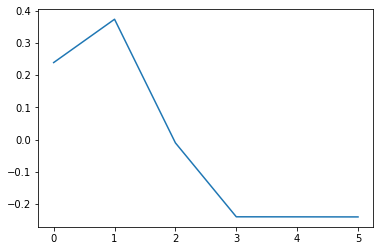

In [263]:
plt.plot(cor)